In [11]:
import pickle
import matplotlib.pyplot as plt

In [14]:
with open('../outputs/train_metrics.pickle', 'rb') as f:
    training_metrics = pickle.load(f)

[(0, 1), (1, 2045), (2, 4089), (3, 6133), (4, 8177)]

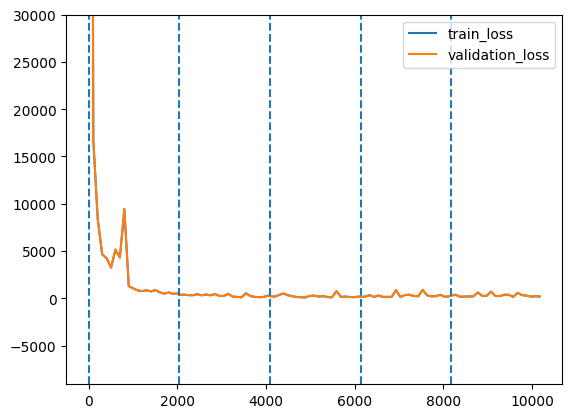

In [31]:
plt.plot(*list(zip(*[(m['total_step'], m['train_loss']) for m in training_metrics])), label='train_loss')
plt.plot(*list(zip(*[(m['total_step'], m['validation_loss']) for m in training_metrics])), label='validation_loss')
for point in [m['total_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--')
plt.ylim(top=30e3)
plt.legend()
plt.show()

In [32]:
min([m['validation_loss'] for m in training_metrics])

93.97005462646484

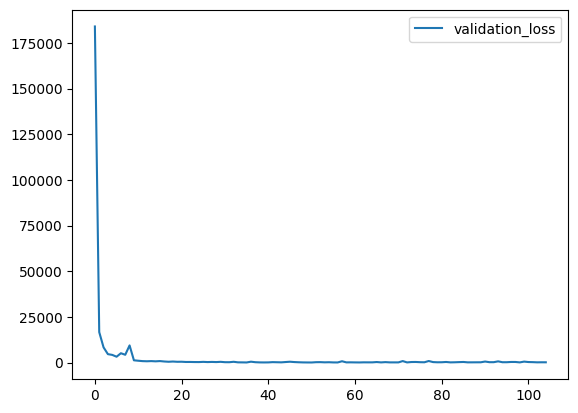

In [17]:
# plt.plot([m['train_loss'] for m in training_metrics], label='train_loss')
plt.plot([m['validation_loss'] for m in training_metrics], label='validation_loss')
plt.legend()
plt.show()